Import Libraries and Loading dataset

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [23]:
#Loading dataset
df = pd.read_csv('final_data.csv')
#Identify Columns
df.head()

,sex,patient_type,entry_date,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,2020-04-05,NaN,1.5,2.0,27,1.5,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,1.5
1,2,1,2020-03-19,NaN,1.5,2.0,24,1.5,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5,1,1.5
2,1,2,2020-06-04,NaN,2.0,2.0,54,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.5,1,2.0
3,2,2,2020-04-17,NaN,2.0,1.0,30,1.5,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5,1,2.0
4,1,2,2020-04-13,2020-04-22,2.0,2.0,60,2.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.5,1,2.0


In [16]:
df1 = df[df['date_died'].notnull()]
df1.head()

,sex,patient_type,entry_date,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
4,1,2,2020-04-13,2020-04-22,2.0,2.0,60,2.0,1.0,2.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.5,1,2.0
5,2,2,2020-04-16,2020-04-29,2.0,1.0,47,1.5,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.5,1,1.0
24,1,1,2020-05-15,2020-05-21,1.5,2.0,61,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1,1.5
35,2,2,2020-04-27,2020-04-28,2.0,1.0,77,1.5,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.5,1,2.0
40,1,2,2020-04-26,2020-04-26,2.0,1.0,53,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.5,1,2.0


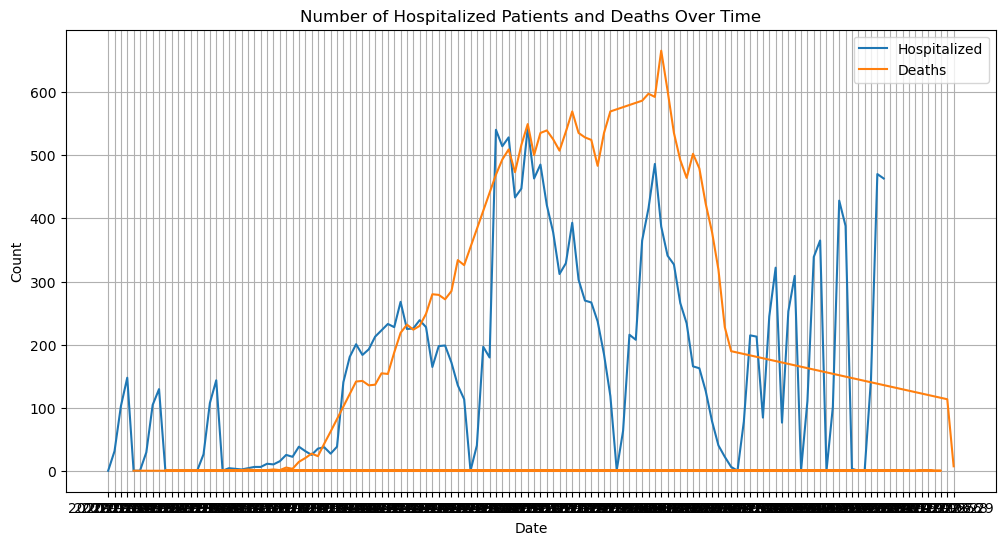

In [24]:
# Biểu đồ đường (Line chart) thể hiện số lượng bệnh nhân nhập viện hoặc tử vong theo thời gian
df_entry_date = df1.groupby('entry_date').size().reset_index(name='count')
df_date_died = df1.groupby('date_died').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.plot(df_entry_date['entry_date'], df_entry_date['count'], label='Hospitalized')
plt.plot(df_date_died['date_died'], df_date_died['count'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of Hospitalized Patients and Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
df = df.drop(['entry_date', 'date_died'], axis=1)
df.shape

(285541, 19)

In [26]:
features=['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'contact_other_covid', 'icu']
list(enumerate(features))

[(0, 'sex'),
 (1, 'patient_type'),
 (2, 'intubed'),
 (3, 'pneumonia'),
 (4, 'pregnancy'),
 (5, 'diabetes'),
 (6, 'copd'),
 (7, 'asthma'),
 (8, 'inmsupr'),
 (9, 'hypertension'),
 (10, 'other_disease'),
 (11, 'cardiovascular'),
 (12, 'obesity'),
 (13, 'renal_chronic'),
 (14, 'tobacco'),
 (15, 'contact_other_covid'),
 (16, 'icu')]

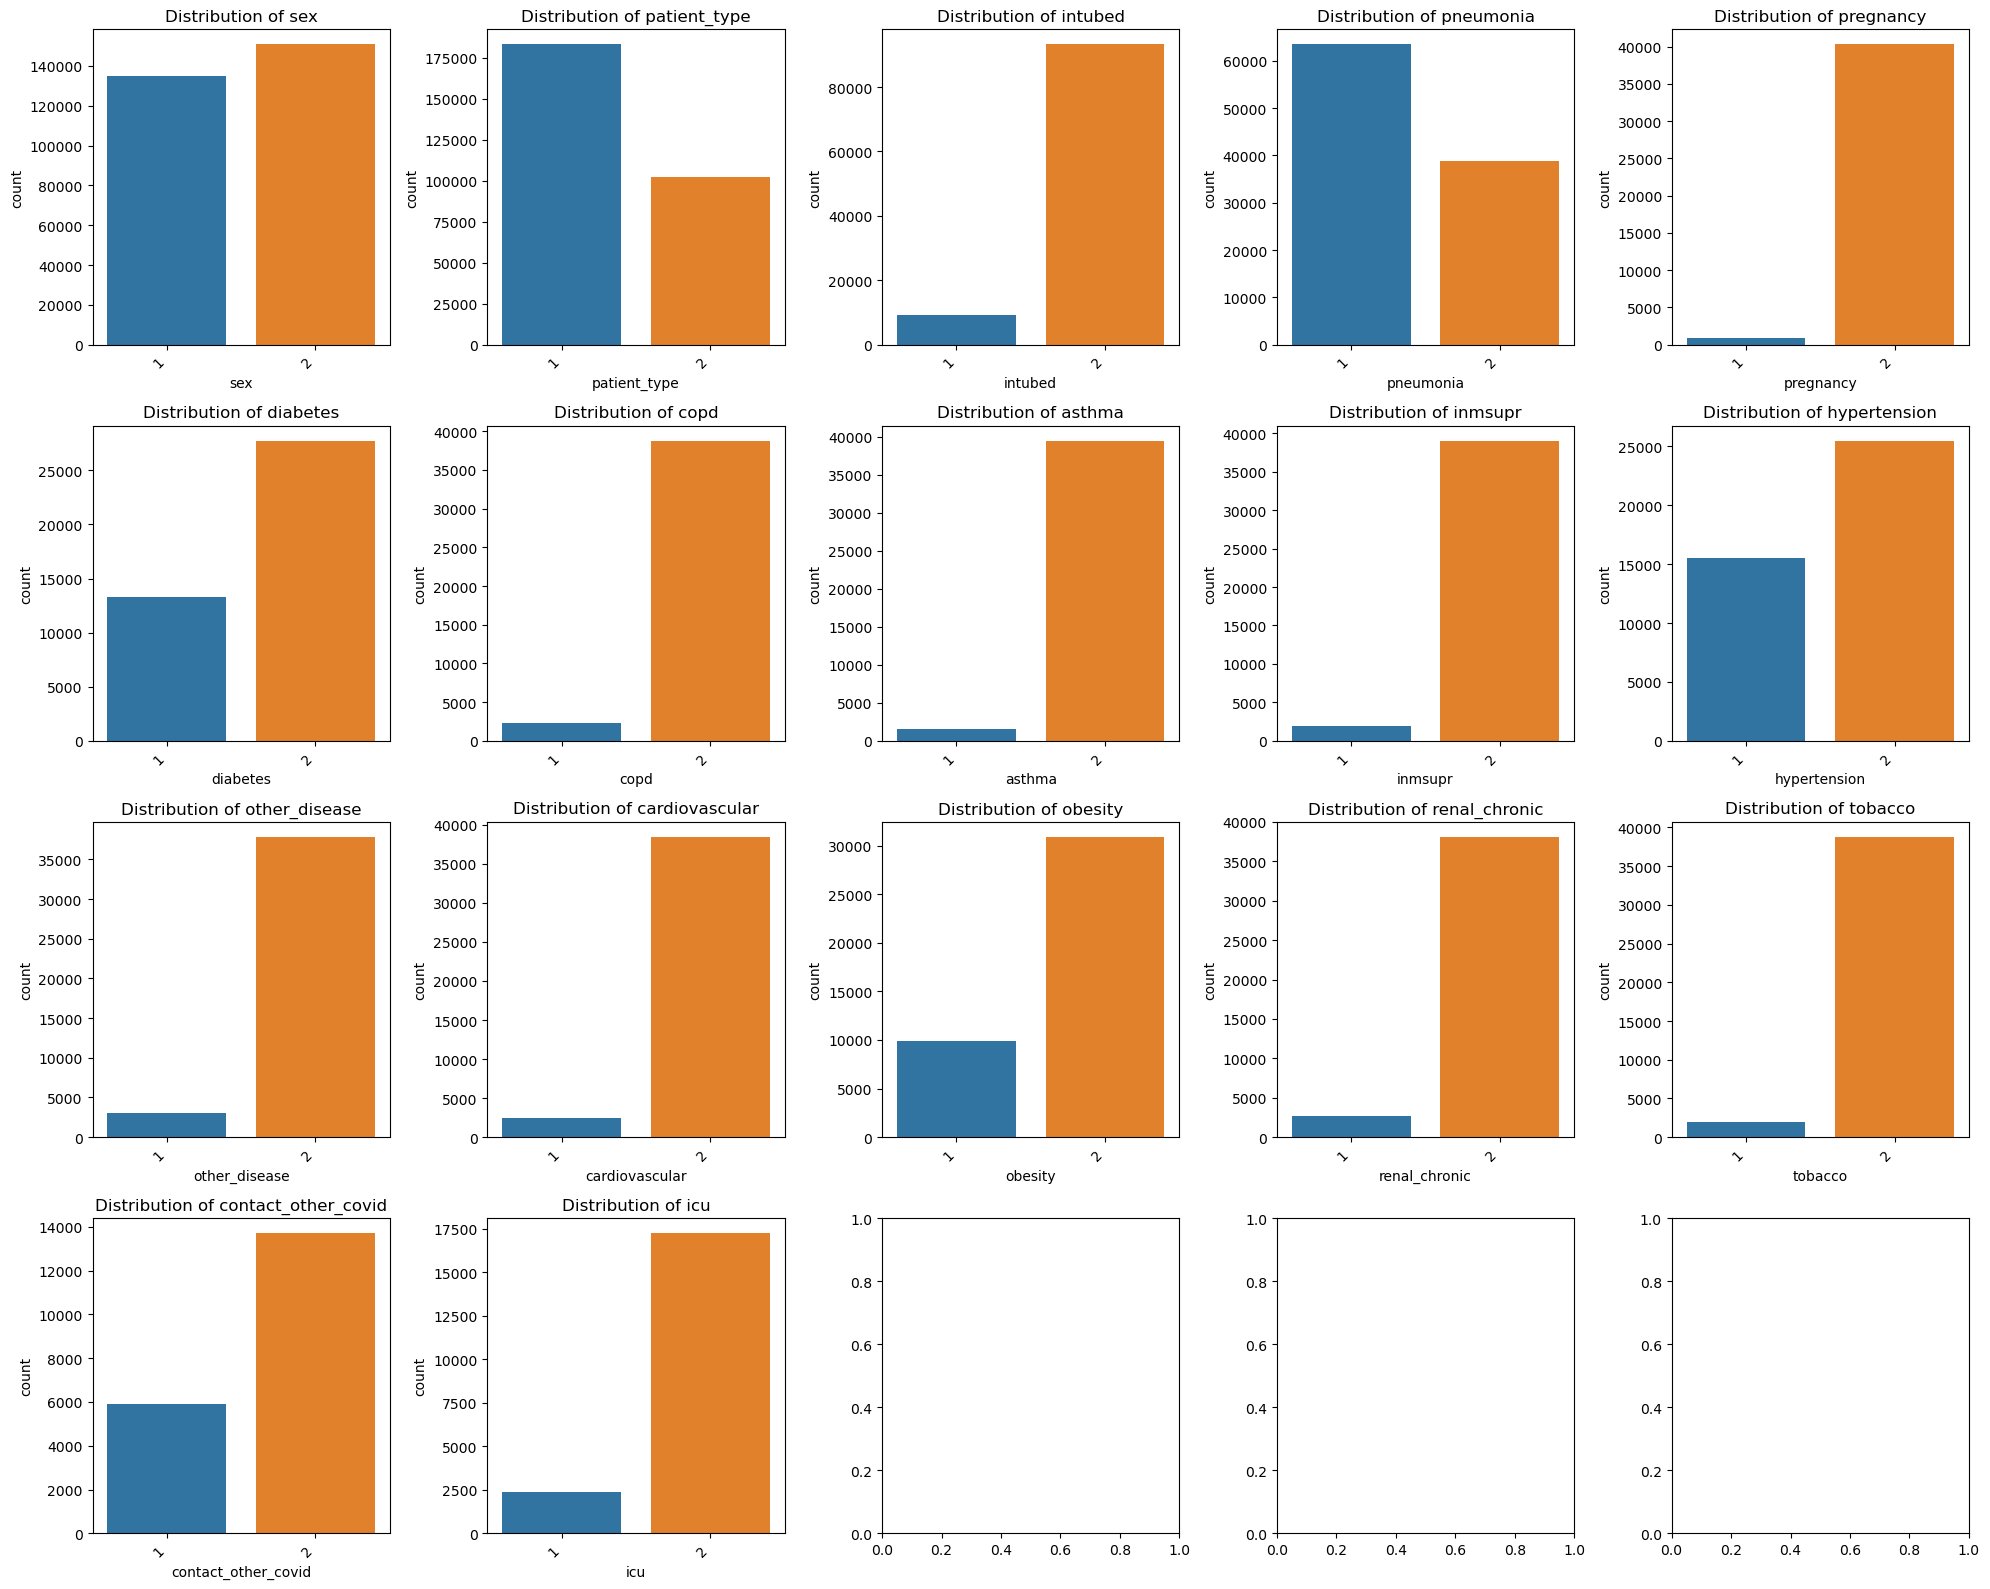

In [27]:
# Ma trận biểu đồ cột thể hiện số lượng bệnh nhân của từng thuộc tính: (Châu)

fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.ravel()

for i, feature in enumerate(features):
    df = df[df[feature] != 1.5]
    df[feature] = df[feature].astype(int)
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

Giá trị và số lượng của cột 'covid_res':
covid_res
1    11462
0     8143
Name: count, dtype: int64


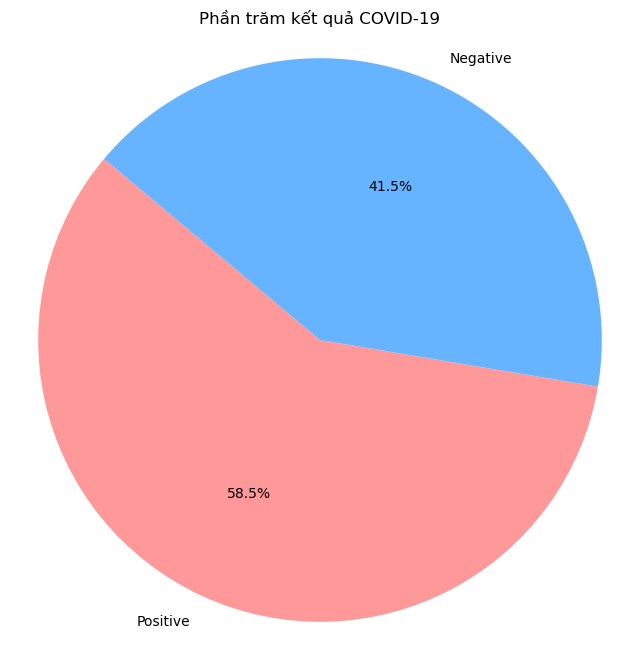

In [28]:
# Biểu đồ tròn (Pie chart) thể hiện phần trăm số lượng người mắc covid và người ko mắc covid. (Đạt)
# Đếm số lượng các giá trị trong cột 'covid_res'
covid_counts = df['covid_res'].value_counts()

# Xuất giá trị và số lượng
print("Giá trị và số lượng của cột 'covid_res':")
print(covid_counts)
# Tạo danh sách các nhãn và giá trị phần trăm
labels = ['Positive', 'Negative']
sizes = [covid_counts.get(1, 0), covid_counts.get(0, 0)]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])

# Thêm tiêu đề
plt.title('Phần trăm kết quả COVID-19')

# Hiển thị biểu đồ
plt.axis('equal')  # Đảm bảo biểu đồ tròn
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


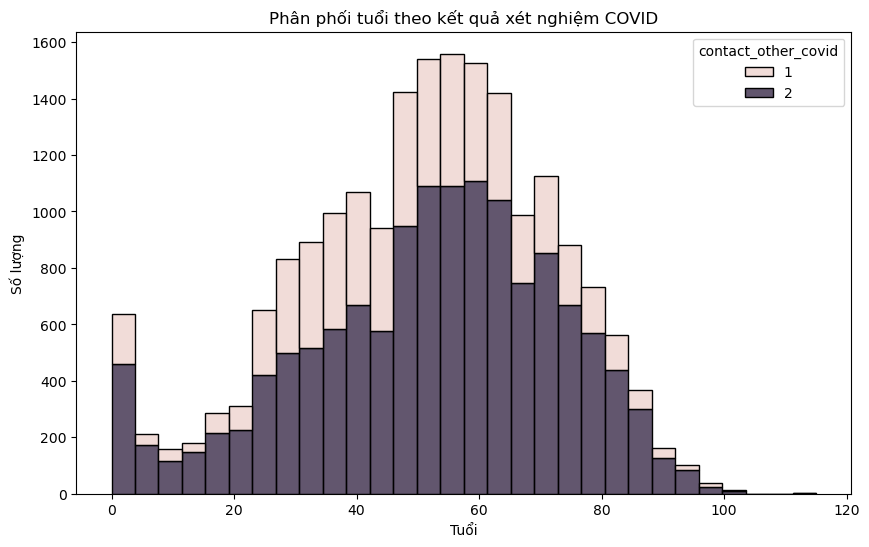

In [29]:
# Biểu đồ phân tán (Scatter plot) hoặc Histogram mối quan hệ giữa tuổi và kết quả xét nghiệm covid. (Bảo)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='contact_other_covid', multiple='stack', bins=30)
plt.title('Phân phối tuổi theo kết quả xét nghiệm COVID')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng')
plt.show()

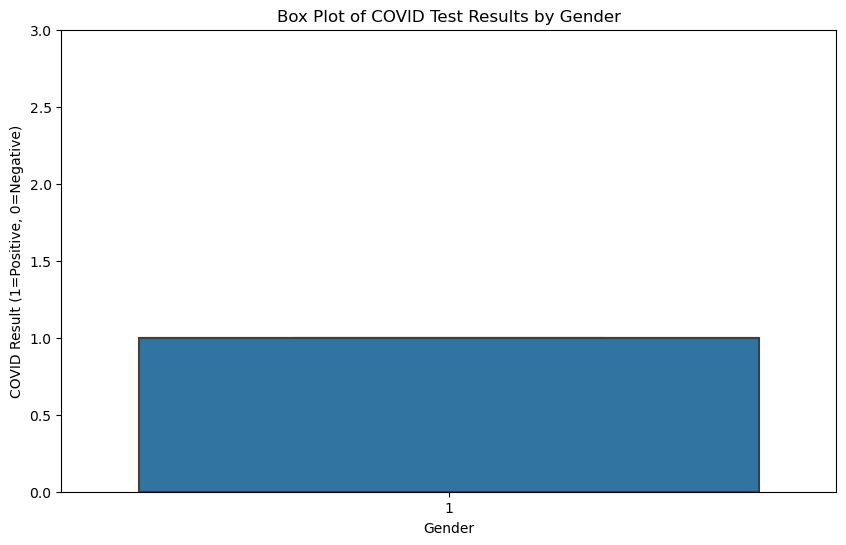

In [31]:
# Biểu đồ hộp (Box plot) mối quan hệ giữa giới tính của bệnh nhân theo kết quả xét nghệm covid. (An)
# Mã hóa 'covid_res' thành giá trị số
#df['covid_res_num'] = df['covid_res'].replace({'Positive': 1, 'Negative': 0})

# Vẽ biểu đồ hộp
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='covid_res', data=df)

# Thiết lập tiêu đề và nhãn
plt.ylim(0, 3)
plt.title('Box Plot of COVID Test Results by Gender')
plt.xlabel('Gender')
plt.ylabel('COVID Result (1=Positive, 0=Negative)')

# Hiển thị biểu đồ
plt.show()